# Sierralone Solar Data - Exploratory Data Analysis (EDA)
Prepared as part of the 10 Academy Challenge Task 2


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('../data/sierraleone-bumbuna.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


## Summary Statistics & Missing Values

In [2]:
# Summary statistics
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [3]:
# Missing values
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

Comments    525600
dtype: int64

In [4]:
# Columns with >5% missing
threshold = 0.05 * len(df)
missing[missing > threshold]

Comments    525600
dtype: int64

## Outlier Detection & Cleaning

In [5]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[columns_to_check].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Outliers found: {outliers.sum()}")
df_cleaned = df[~outliers]

# Impute missing with median
df_cleaned[columns_to_check] = df_cleaned[columns_to_check].fillna(df_cleaned[columns_to_check].median())

# Save cleaned file
df_cleaned.to_csv('../data/sierraleone_clean.csv', index=False)

Outliers found: 16292


## Time Series Analysis

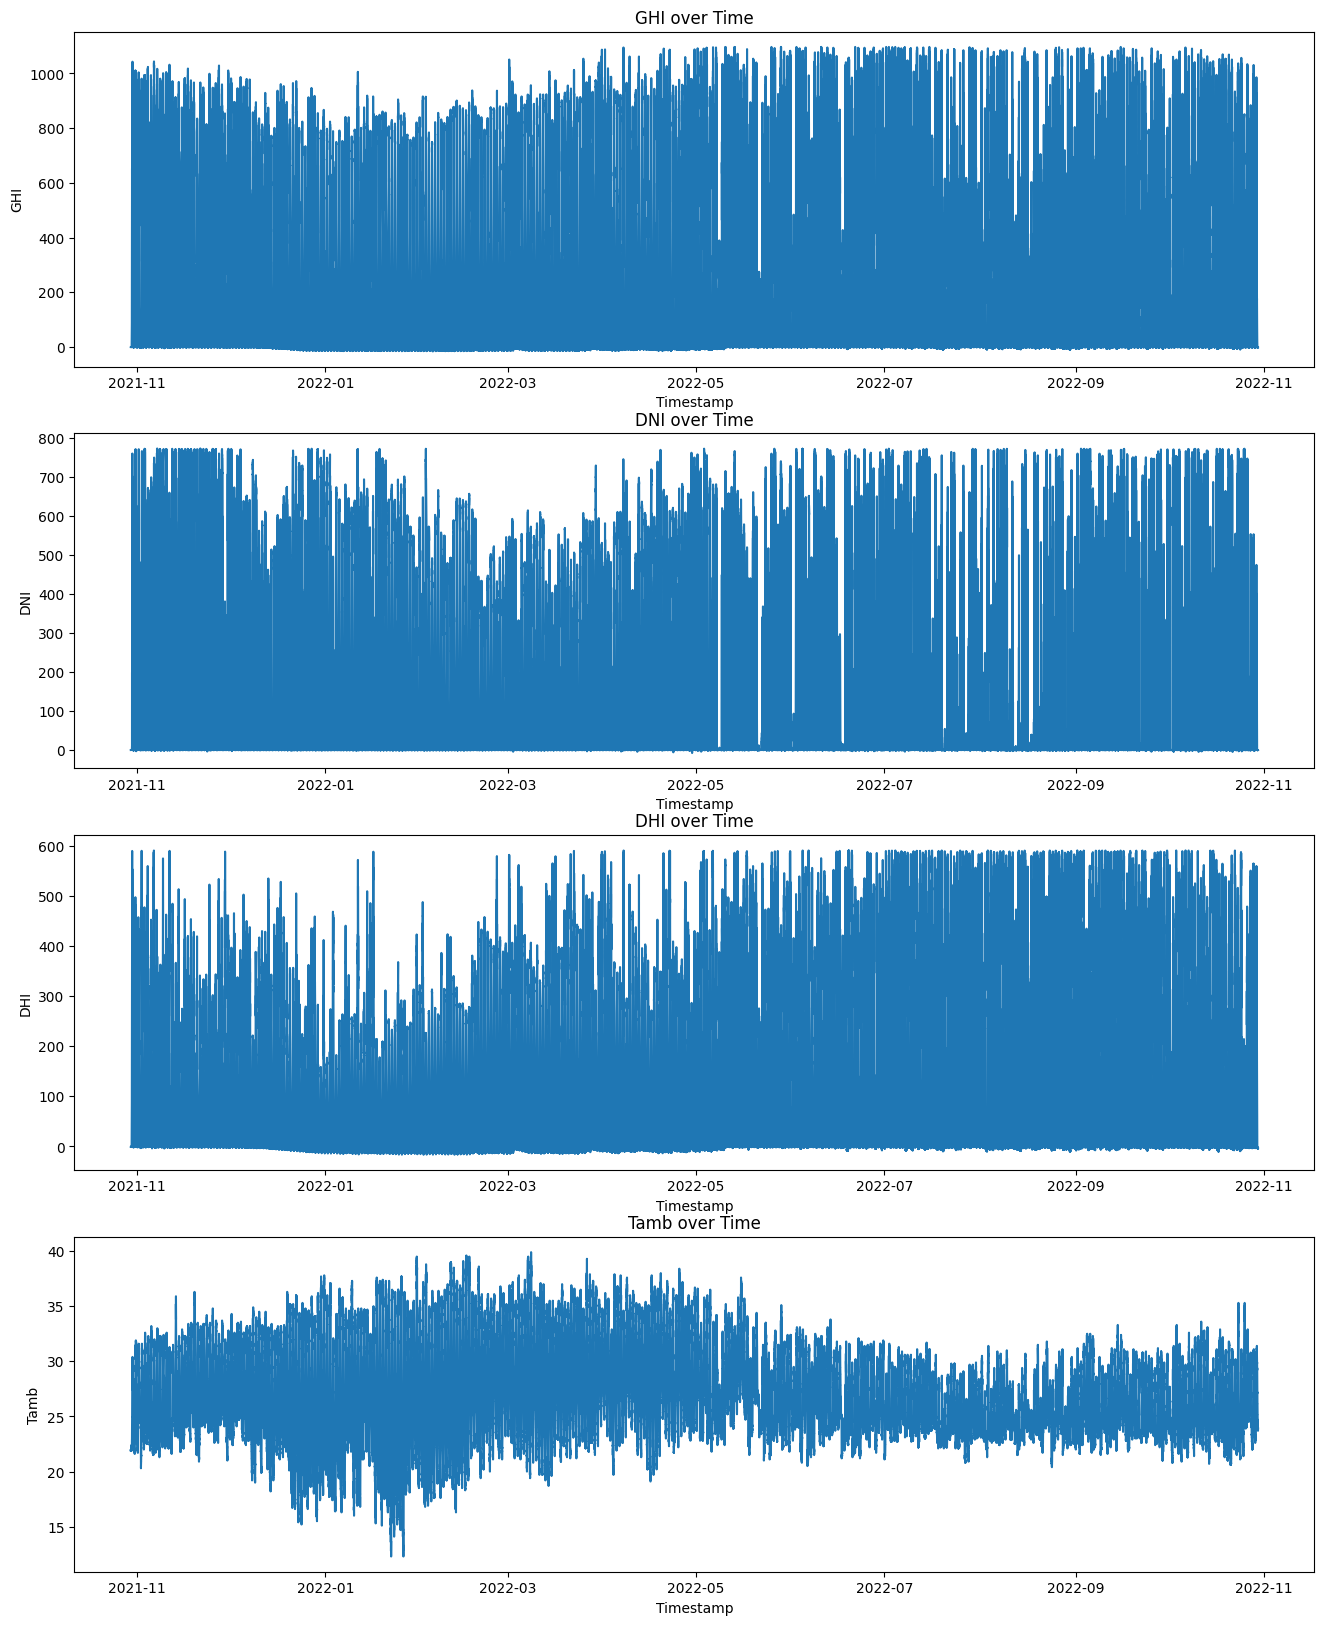

In [6]:
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])
fig, axs = plt.subplots(4, 1, figsize=(16, 20))
for i, col in enumerate(['GHI', 'DNI', 'DHI', 'Tamb']):
    sns.lineplot(x='Timestamp', y=col, data=df_cleaned, ax=axs[i])
    axs[i].set_title(f'{col} over Time')

<Axes: title={'center': 'Hourly Trends'}, xlabel='hour'>

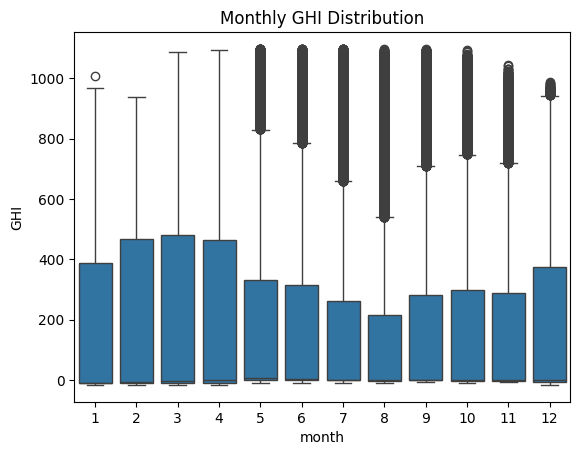

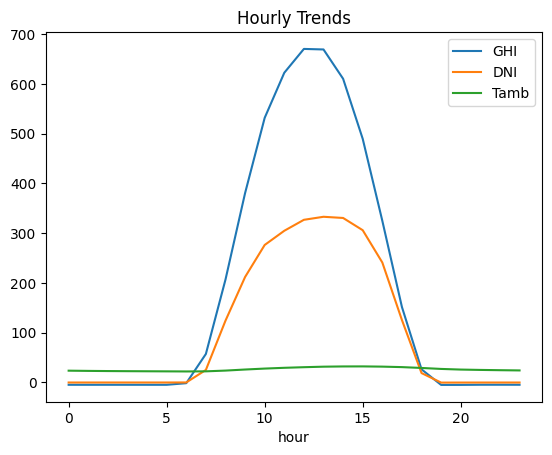

In [7]:
df_cleaned['month'] = df_cleaned['Timestamp'].dt.month
df_cleaned['hour'] = df_cleaned['Timestamp'].dt.hour

sns.boxplot(x='month', y='GHI', data=df_cleaned)
plt.title("Monthly GHI Distribution")
df_cleaned.groupby('hour')[['GHI', 'DNI', 'Tamb']].mean().plot(title="Hourly Trends")

## Cleaning Impact

<Axes: title={'center': 'Effect of Cleaning on ModA & ModB'}, xlabel='Cleaning'>

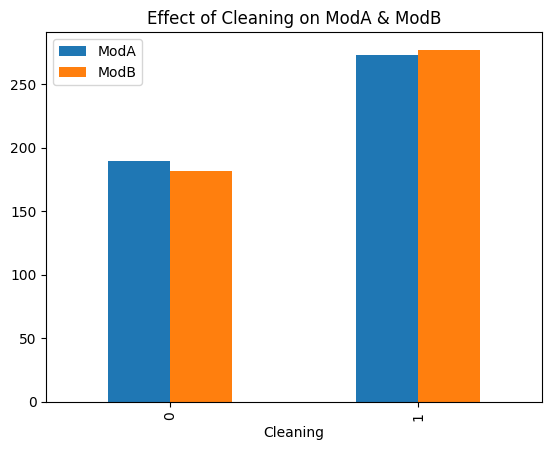

In [8]:
df_cleaned.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar', title="Effect of Cleaning on ModA & ModB")

## Correlation & Relationship Analysis

<Axes: >

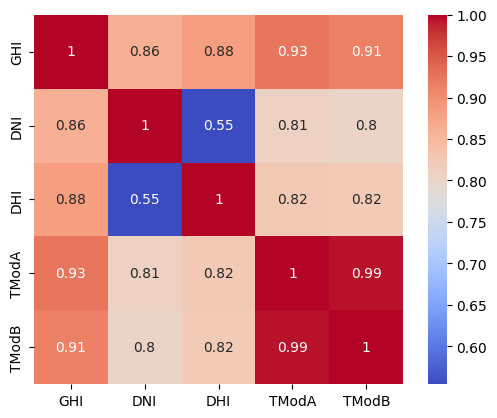

In [9]:
corr = df_cleaned[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)

<Axes: xlabel='WS', ylabel='GHI'>

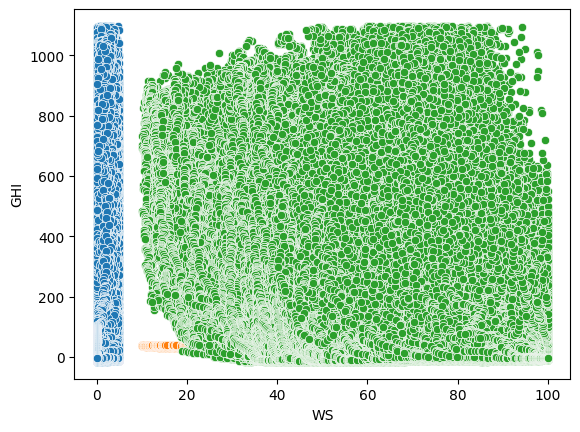

In [10]:
sns.scatterplot(x='WS', y='GHI', data=df_cleaned)
sns.scatterplot(x='RH', y='Tamb', data=df_cleaned)
sns.scatterplot(x='RH', y='GHI', data=df_cleaned)

## Wind & Distribution Analysis

Text(0.5, 1.0, 'Wind Speed Distribution')

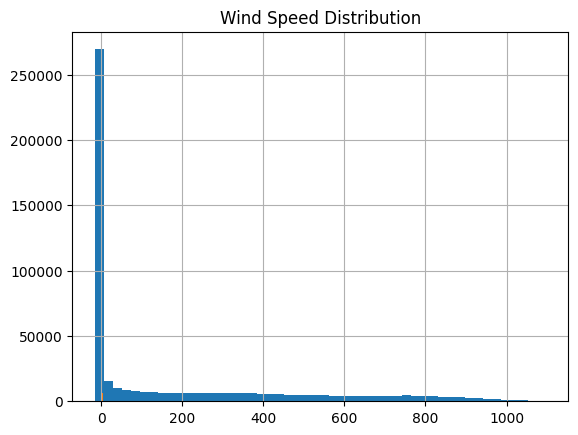

In [11]:
# Histograms
df_cleaned['GHI'].hist(bins=50)
plt.title("GHI Distribution")

df_cleaned['WS'].hist(bins=50)
plt.title("Wind Speed Distribution")

## Temperature & Humidity Analysis

Text(0.5, 1.0, 'Relative Humidity vs Ambient Temperature')

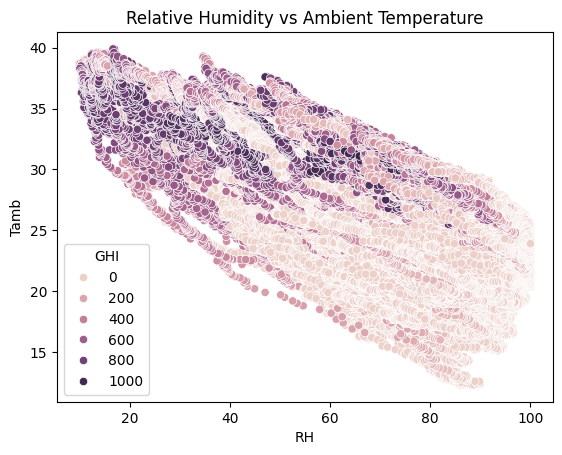

In [12]:
sns.scatterplot(x='RH', y='Tamb', hue='GHI', data=df_cleaned)
plt.title("Relative Humidity vs Ambient Temperature")

## Bubble Chart

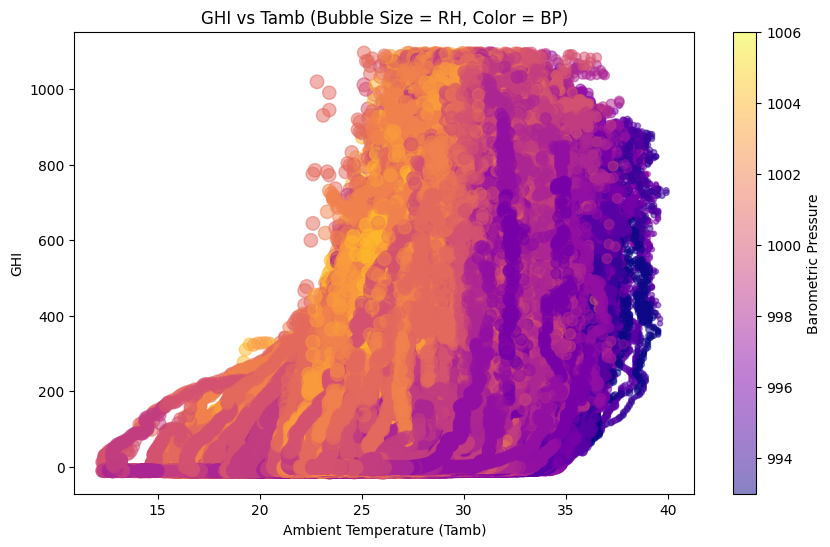

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_cleaned['Tamb'], df_cleaned['GHI'],
    s=df_cleaned['RH'], alpha=0.5,
    c=df_cleaned['BP'], cmap='plasma'
)
plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('GHI')
plt.title('GHI vs Tamb (Bubble Size = RH, Color = BP)')
plt.colorbar(label='Barometric Pressure')